# import

In [392]:
import pandas as pd
import missingno as msno
import numpy as np
import chardet
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, RobustScaler


# 모든 경고를 무시
warnings.filterwarnings("ignore")

# 데이터 로드

In [395]:
pd.set_option('display.float_format', '{:.2f}'.format)
train = pd.read_csv('./train.csv')
train.info()
columns_to_drop = ['FLAG_MOBIL','FLAG_CONT_MOBILE']
train.drop(columns = columns_to_drop)
train.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [396]:
'''
flag_document_columns = [f"FLAG_DOCUMENT_{i}" for i in range(2, 22)]
train['TOTAL_FLAG_DOCUMENT'] = train[flag_document_columns].sum(axis=1)
'''

'\nflag_document_columns = [f"FLAG_DOCUMENT_{i}" for i in range(2, 22)]\ntrain[\'TOTAL_FLAG_DOCUMENT\'] = train[flag_document_columns].sum(axis=1)\n'

In [397]:
# train['TOTAL_FLAG_DOCUMENT'].describe()

In [398]:
# FLAG_DOCUMENT 열과 TARGET의 상관계수 계산
'''
correlation_matrix = missing_to_median[flag_document_columns + ['TARGET']].corr()

# Heatmap 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of FLAG_DOCUMENT Features with TARGET')
plt.show()
'''

"\ncorrelation_matrix = missing_to_median[flag_document_columns + ['TARGET']].corr()\n\n# Heatmap 그리기\nplt.figure(figsize=(12, 8))\nsns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)\nplt.title('Correlation Heatmap of FLAG_DOCUMENT Features with TARGET')\nplt.show()\n"

In [399]:
import seaborn as sns
import matplotlib.pyplot as plt

# FLAG_DOCUMENT 열 목록 생성
columns_to_drop1 = [f"FLAG_DOCUMENT_{i}" for i in range(4, 22)]
columns_to_drop2 = ["FLAG_DOCUMENT_2"]
train = train.drop(columns = columns_to_drop1)
train = train.drop(columns = columns_to_drop2)
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,...,2.00,2.00,-1134.00,1,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,...,1.00,0.00,-828.00,1,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,...,0.00,0.00,-815.00,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,...,2.00,0.00,-617.00,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,...,0.00,0.00,-1106.00,0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.00,254700.00,27558.00,...,0.00,0.00,-273.00,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.00,269550.00,12001.50,...,0.00,0.00,0.00,1,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.00,677664.00,29979.00,...,6.00,0.00,-1909.00,1,1.00,0.00,0.00,1.00,0.00,1.00
307509,456254,1,Cash loans,F,N,Y,0,171000.00,370107.00,20205.00,...,0.00,0.00,-322.00,1,0.00,0.00,0.00,0.00,0.00,0.00


# 결측치 처리

In [406]:
# 결측치 데이터프레임 불러오기
missing_values = pd.read_csv('missing_values_report.csv')

# 파일 인코딩 감지
with open('./HomeCredit_columns_description.csv', 'rb') as file:
    raw_data = file.read()
    encoding_detected = chardet.detect(raw_data)['encoding']

# 감지된 인코딩으로 파일 읽기
description = pd.read_csv('./HomeCredit_columns_description.csv', encoding=encoding_detected)




# 열 설명을 데이터프레임으로 변환
description_df = pd.DataFrame(list(description.items()), columns=['Column', 'Description'])

# 결측치 데이터프레임과 병합
missing_values_with_descriptions = pd.merge(
    missing_values, description, on='Column', how='inner'
)

# 업데이트된 데이터프레임을 CSV로 저장
missing_values_with_descriptions.to_csv('missing_values_report_with_descriptions.csv', index=False)

# 저장 완료 메시지 출력
print("설명이 추가된 결측치 정보가 'missing_values_report_with_descriptions.csv' 파일로 저장되었습니다.")


설명이 추가된 결측치 정보가 'missing_values_report_with_descriptions.csv' 파일로 저장되었습니다.


<Axes: >

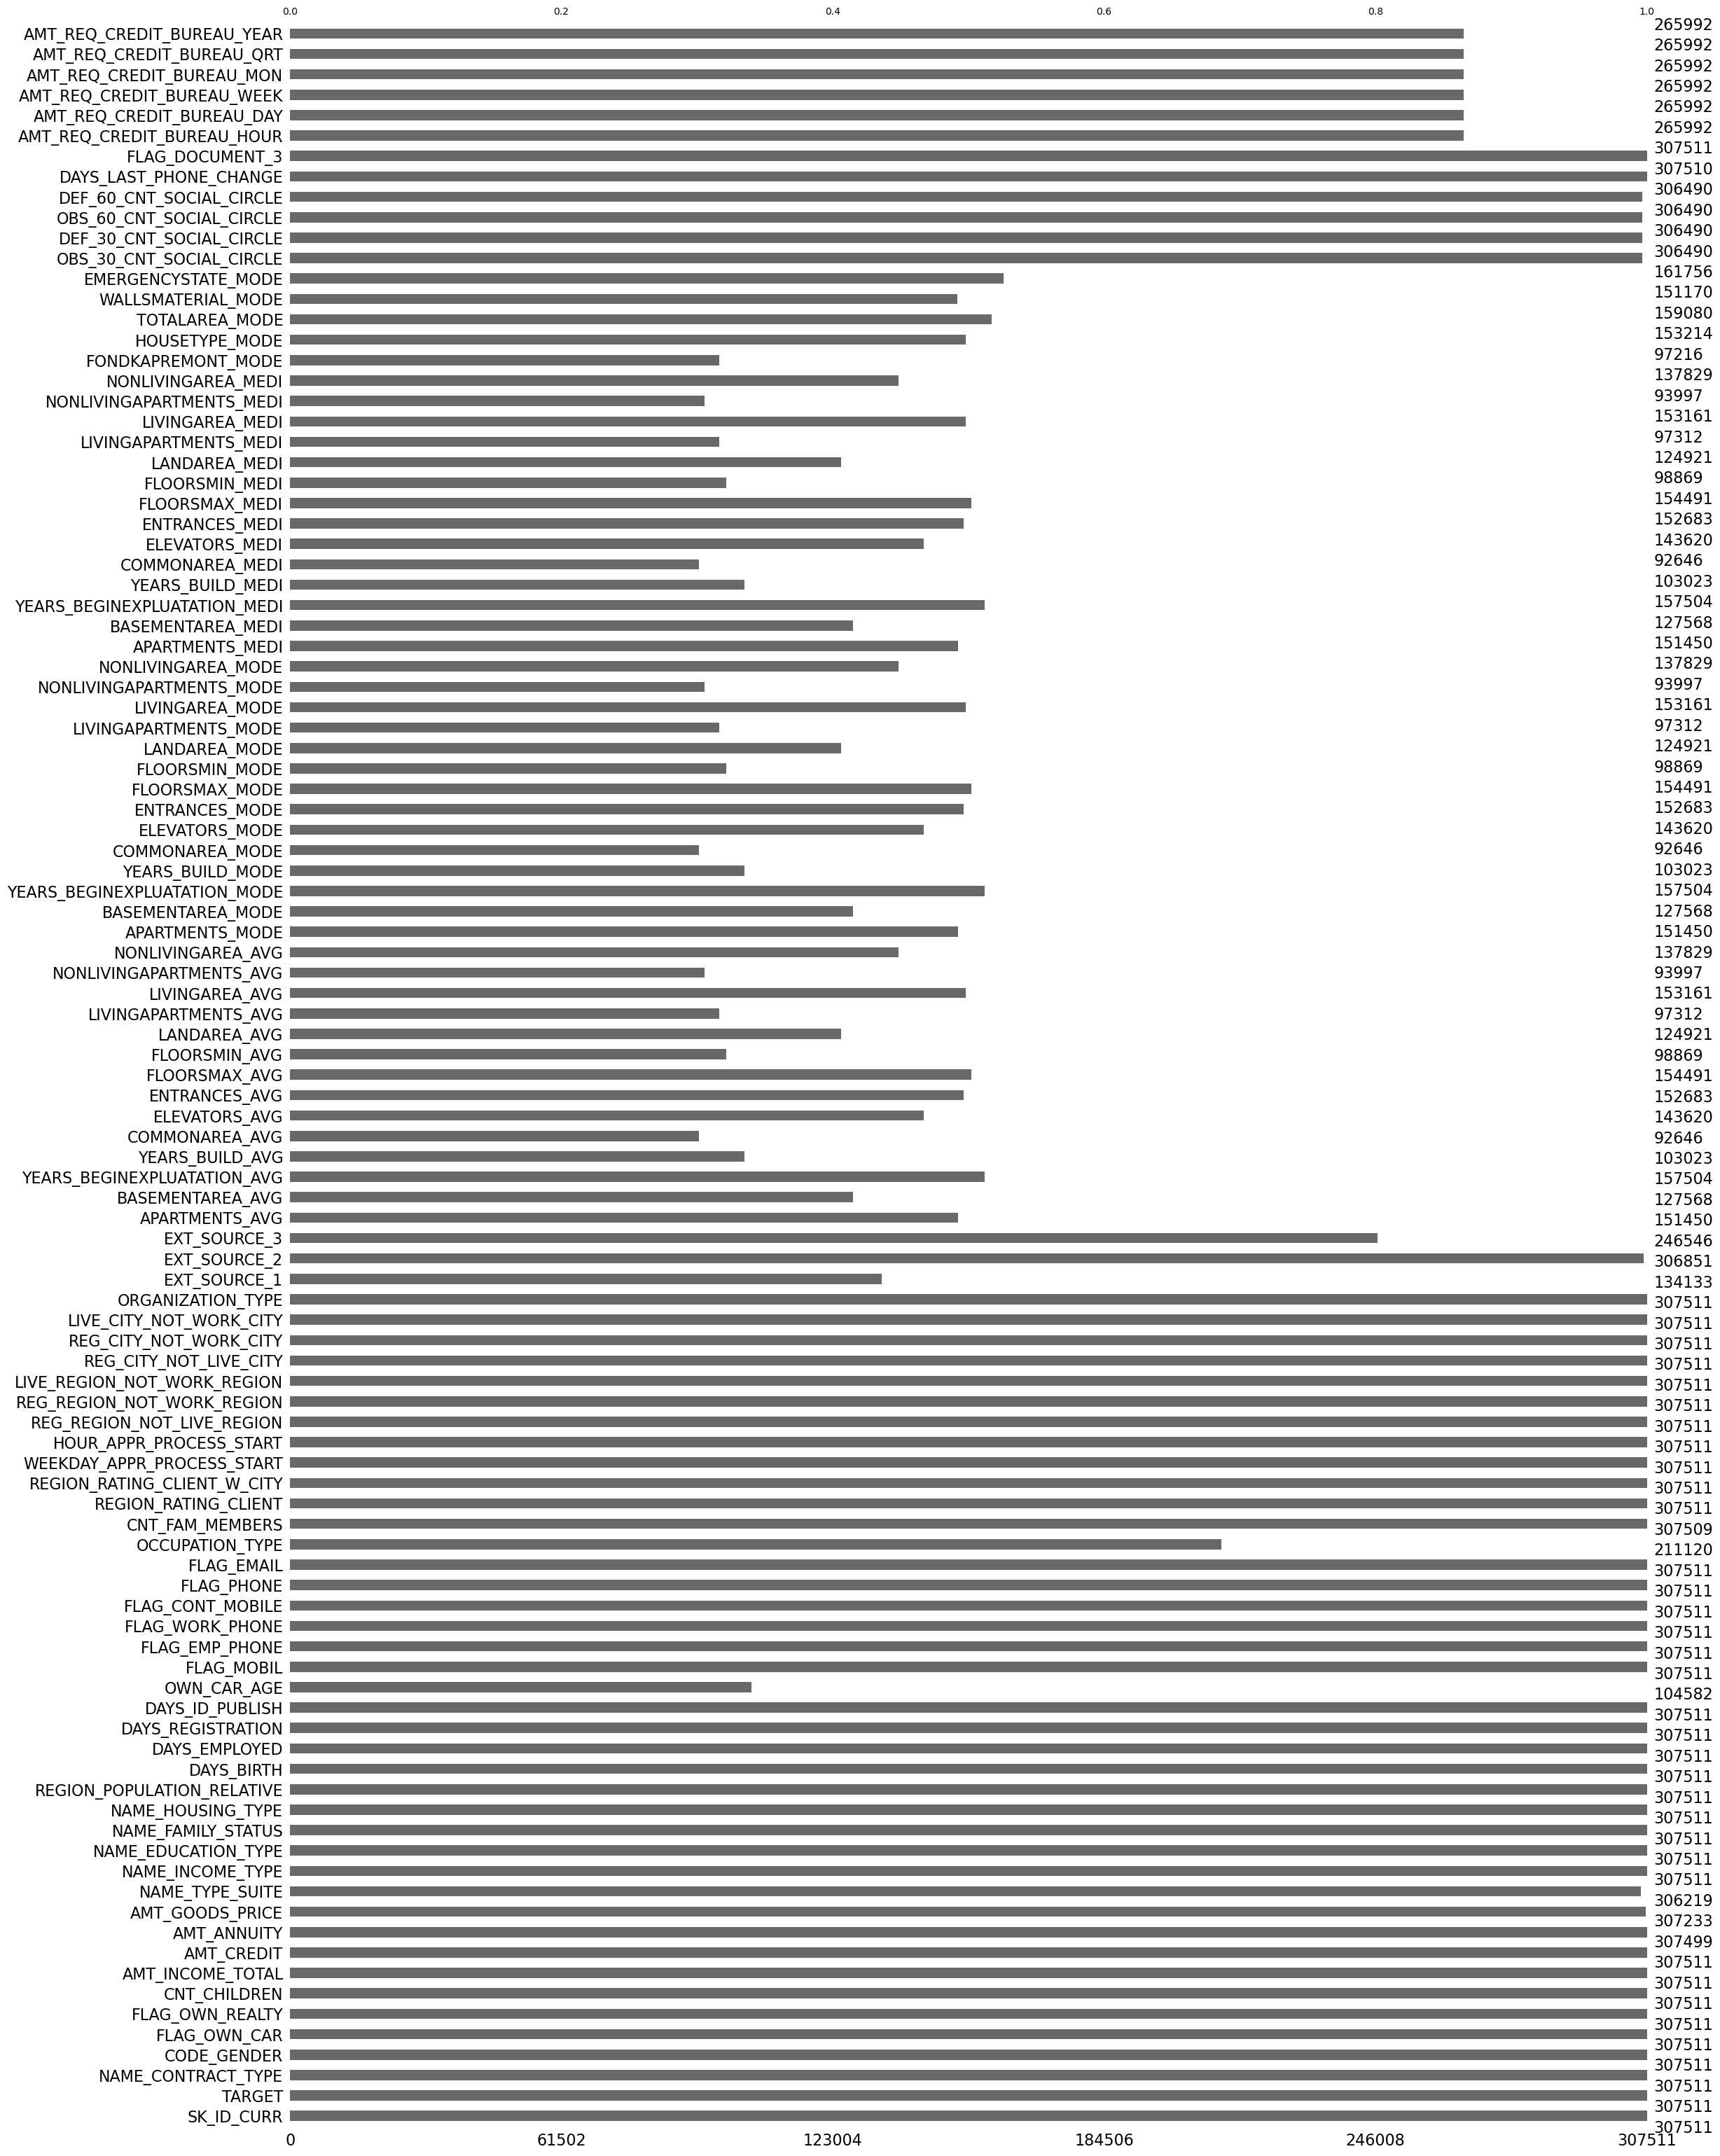

In [408]:
msno.bar(train)

In [409]:
# 결측치가 존재하는 열의 수 확인
missing_columns_count = train.isnull().sum()[train.isnull().sum() > 0].count()

print(f"결측치가 존재하는 열의 수: {missing_columns_count}")

missing_data = train.isnull().sum() / len(train) * 100
missing_data = missing_data.sort_values(ascending=False)
print(missing_data)

threshold = 0.47
columns_to_drop = missing_data[missing_data > threshold * 100].index
train = train.drop(columns=columns_to_drop)

# 결측치가 존재하는 열의 수 확인
missing_columns_count = train.isnull().sum()[train.isnull().sum() > 0].count()

print(f"결측치가 존재하는 열의 수: {missing_columns_count}")

결측치가 존재하는 열의 수: 67
COMMONAREA_MODE            69.87
COMMONAREA_AVG             69.87
COMMONAREA_MEDI            69.87
NONLIVINGAPARTMENTS_MODE   69.43
NONLIVINGAPARTMENTS_MEDI   69.43
                            ... 
FLAG_WORK_PHONE             0.00
FLAG_EMP_PHONE              0.00
FLAG_MOBIL                  0.00
DAYS_ID_PUBLISH             0.00
SK_ID_CURR                  0.00
Length: 103, dtype: float64
결측치가 존재하는 열의 수: 18


In [411]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,...,2.00,2.00,-1134.00,1,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,...,1.00,0.00,-828.00,1,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,...,0.00,0.00,-815.00,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,...,2.00,0.00,-617.00,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,...,0.00,0.00,-1106.00,0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.00,254700.00,27558.00,...,0.00,0.00,-273.00,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.00,269550.00,12001.50,...,0.00,0.00,0.00,1,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.00,677664.00,29979.00,...,6.00,0.00,-1909.00,1,1.00,0.00,0.00,1.00,0.00,1.00
307509,456254,1,Cash loans,F,N,Y,0,171000.00,370107.00,20205.00,...,0.00,0.00,-322.00,1,0.00,0.00,0.00,0.00,0.00,0.00


In [412]:
# 결측치가 존재하는 열의 수 확인
missing_columns_count = train.isnull().sum()[train.isnull().sum() > 0].count()

print(f"결측치가 존재하는 열의 수: {missing_columns_count}")

train.describe()

결측치가 존재하는 열의 수: 18


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,...,306490.00,306490.00,307510.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,...,1.41,0.10,-962.86,0.71,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,...,2.38,0.36,826.81,0.45,0.08,0.11,0.20,0.92,0.79,1.87
min,100002.00,0.00,0.00,25650.00,45000.00,1615.50,40500.00,0.00,-25229.00,-17912.00,...,0.00,0.00,-4292.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,189145.50,0.00,0.00,112500.00,270000.00,16524.00,238500.00,0.01,-19682.00,-2760.00,...,0.00,0.00,-1570.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,278202.00,0.00,0.00,147150.00,513531.00,24903.00,450000.00,0.02,-15750.00,-1213.00,...,0.00,0.00,-757.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,367142.50,0.00,1.00,202500.00,808650.00,34596.00,679500.00,0.03,-12413.00,-289.00,...,2.00,0.00,-274.00,1.00,0.00,0.00,0.00,0.00,0.00,3.00
max,456255.00,1.00,19.00,117000000.00,4050000.00,258025.50,4050000.00,0.07,-7489.00,365243.00,...,344.00,24.00,0.00,1.00,4.00,9.00,8.00,27.00,261.00,25.00


In [419]:
# 각 열의 결측치 개수 확인
missing_data = train.isnull().sum()

# 결측치가 있는 열만 필터링
missing_columns = missing_data[missing_data > 0]

# 결측치가 있는 열 출력
print("결측치가 있는 열들:")
print(missing_columns)

결측치가 있는 열들:
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64


# 결측치 삭제(case 1)

In [422]:
# 결측치가 있는 행 삭제
missing_drop = train.dropna()

# 삭제한 데이터를 'missing_drop.csv'로 저장
missing_drop.to_csv('missing_drop.csv', index=False)

print("결측치를 삭제한 데이터를 'missing_drop.csv'로 저장했습니다.")

# 남은 결측치 갯수 확인
remaining_missing_data = missing_drop.isnull().sum().sum()

# 남은 결측치 갯수 출력
print(f"삭제 후 남은 결측치 갯수: {remaining_missing_data}")
# missing_drop 데이터프레임의 'CODE_GENDER' 열의 고유값 확인
unique_values = missing_drop['CODE_GENDER'].unique()

print(f"'CODE_GENDER' 열의 고유값: {unique_values}")


결측치를 삭제한 데이터를 'missing_drop.csv'로 저장했습니다.
삭제 후 남은 결측치 갯수: 0
'CODE_GENDER' 열의 고유값: ['M' 'F' 'XNA']


In [423]:
missing_drop

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,...,2.00,2.00,-1134.00,1,0.00,0.00,0.00,0.00,0.00,1.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,...,0.00,0.00,-815.00,0,0.00,0.00,0.00,0.00,0.00,0.00
5,100008,0,Cash loans,M,N,Y,0,99000.00,490495.50,27517.50,...,0.00,0.00,-2536.00,1,0.00,0.00,0.00,0.00,1.00,1.00
6,100009,0,Cash loans,F,Y,Y,1,171000.00,1560726.00,41301.00,...,1.00,0.00,-1562.00,0,0.00,0.00,0.00,1.00,1.00,2.00
7,100010,0,Cash loans,M,Y,Y,0,360000.00,1530000.00,42075.00,...,2.00,0.00,-1070.00,1,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456246,0,Cash loans,F,N,Y,1,94500.00,225000.00,10620.00,...,0.00,0.00,-1516.00,1,0.00,0.00,0.00,0.00,0.00,1.00
307503,456247,0,Cash loans,F,N,Y,0,112500.00,345510.00,17770.50,...,9.00,2.00,-2315.00,1,0.00,0.00,0.00,1.00,0.00,2.00
307508,456253,0,Cash loans,F,N,Y,0,153000.00,677664.00,29979.00,...,6.00,0.00,-1909.00,1,1.00,0.00,0.00,1.00,0.00,1.00
307509,456254,1,Cash loans,F,N,Y,0,171000.00,370107.00,20205.00,...,0.00,0.00,-322.00,1,0.00,0.00,0.00,0.00,0.00,0.00


# 결측치 중앙값 대체 (case 2)

In [425]:
# 결측치 중앙값으로 대체
missing_to_median = train.copy()  # 원본 데이터프레임 보호

# 데이터가 DataFrame인지 확인 후 처리
if isinstance(missing_to_median, pd.DataFrame):  # DataFrame이면
    for column in missing_to_median.columns:
        if missing_to_median[column].dtype in ['float64', 'int64']:  # 숫자형 데이터만 처리
            median_value = missing_to_median[column].median()
            missing_to_median[column].fillna(median_value, inplace=True)


# 중앙값으로 대체한 데이터를 'train_missing_to_median.csv'로 저장
missing_to_median.to_csv('missing_to_median.csv', index=False)

print("결측치를 중앙값으로 대체한 데이터를 'missing_to_median.csv'로 저장했습니다.")

# 남은 결측치 갯수 확인
remaining_missing_data_median = missing_to_median.isnull().sum().sum()

# 남은 결측치 갯수 출력
print(f"중앙값으로 대체 후 남은 결측치 갯수: {remaining_missing_data_median}")


결측치를 중앙값으로 대체한 데이터를 'missing_to_median.csv'로 저장했습니다.
중앙값으로 대체 후 남은 결측치 갯수: 97683


In [428]:
# 명목형 변수 결측치 제거
missing_to_median = missing_to_median.dropna()

In [429]:
missing_to_median

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,...,2.00,2.00,-1134.00,1,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,...,1.00,0.00,-828.00,1,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,...,0.00,0.00,-815.00,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,...,2.00,0.00,-617.00,1,0.00,0.00,0.00,0.00,0.00,1.00
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,...,0.00,0.00,-1106.00,0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.00,331920.00,16096.50,...,0.00,0.00,0.00,1,0.00,0.00,0.00,0.00,0.00,1.00
307506,456251,0,Cash loans,M,N,N,0,157500.00,254700.00,27558.00,...,0.00,0.00,-273.00,0,0.00,0.00,0.00,0.00,0.00,1.00
307508,456253,0,Cash loans,F,N,Y,0,153000.00,677664.00,29979.00,...,6.00,0.00,-1909.00,1,1.00,0.00,0.00,1.00,0.00,1.00
307509,456254,1,Cash loans,F,N,Y,0,171000.00,370107.00,20205.00,...,0.00,0.00,-322.00,1,0.00,0.00,0.00,0.00,0.00,0.00


## 스케일링

In [431]:
# 수치형 변수 선택
numeric_features = missing_to_median.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"수치형 변수들: {numeric_features}")
print(len(numeric_features))

수치형 변수들: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
42


In [432]:
# QQ 플랏 생성 함수
def plot_qq(data, column):
    plt.figure(figsize=(6, 6))
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()

# 각 수치형 변수에 대해 QQ 플랏 생성
#for column in numeric_features:
    #plot_qq(missing_to_median, column)


## 정규성 띄는 변수들 목록

- AMT_INCOME_TOTAL
- FLAG_MOBIL
- HOUR_APPR_PROCESS_START
- OBS_60_CNT_SOCIAL_CIRCLE
- AMT_REQ_CREDIT_BUREAU_QRT

In [337]:


# 정규성 띠는 변수들에 대해 StandardScaler 적용
normal_columns = ['AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'HOUR_APPR_PROCESS_START',
                  'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_QRT']
scaler_standard = StandardScaler()
missing_to_median[normal_columns] = scaler_standard.fit_transform(missing_to_median[normal_columns])

# 정규성 띠지 않는 변수들에 대해 RobustScaler 적용
non_normal_columns = [col for col in missing_to_median.select_dtypes(include=['int64', 'float64']).columns 
                      if col not in normal_columns and col != 'TARGET']

scaler_robust = RobustScaler()
missing_to_median[non_normal_columns] = scaler_robust.fit_transform(missing_to_median[non_normal_columns])


In [338]:
missing_to_median.select_dtypes(include='number')

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-1.00,1,0.00,0.10,-0.21,-0.06,-0.22,-0.00,0.89,0.42,...,0.25,2.00,-0.28,0.00,0.00,0.00,0.00,0.00,-0.28,0.00
1,-1.00,0,0.00,0.34,1.41,0.53,1.54,-0.82,-0.38,0.19,...,-0.17,0.00,-0.05,0.00,0.00,0.00,0.00,0.00,-0.28,-0.50
2,-1.00,0,0.00,-0.39,-0.71,-1.03,-0.71,-0.47,-0.78,0.59,...,-0.58,0.00,-0.04,-1.00,0.00,0.00,0.00,0.00,-0.28,-0.50
3,-1.00,0,0.00,-0.15,-0.38,0.21,-0.35,-0.58,-0.77,-0.58,...,0.25,0.00,0.12,0.00,0.00,0.00,0.00,0.00,-0.28,0.00
4,-1.00,0,0.00,-0.20,-0.02,-0.22,0.14,0.53,-0.93,-0.58,...,-0.58,0.00,-0.26,-1.00,0.00,0.00,0.00,0.00,-0.28,-0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,1.00,0,0.00,-0.08,-0.35,-0.53,-0.51,0.20,-0.37,-2.34,...,-0.58,0.00,0.59,0.00,0.00,0.00,0.00,0.00,-0.28,0.00
307506,1.00,0,0.00,-0.07,-0.49,0.09,-0.51,0.73,0.91,0.59,...,-0.58,0.00,0.38,-1.00,0.00,0.00,0.00,0.00,-0.28,0.00
307508,1.00,0,0.00,-0.08,0.29,0.22,0.31,-0.74,-0.07,-2.62,...,1.92,0.00,-0.88,0.00,1.00,0.00,0.00,1.00,-0.28,0.00
307509,1.00,1,0.00,-0.02,-0.28,-0.30,-0.30,-0.73,0.46,-1.31,...,-0.58,0.00,0.34,0.00,0.00,0.00,0.00,0.00,-0.28,-0.50


In [339]:
missing_to_median.select_dtypes(include=['int64', 'float64'])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-1.00,1,0.00,0.10,-0.21,-0.06,-0.22,-0.00,0.89,0.42,...,0.25,2.00,-0.28,0.00,0.00,0.00,0.00,0.00,-0.28,0.00
1,-1.00,0,0.00,0.34,1.41,0.53,1.54,-0.82,-0.38,0.19,...,-0.17,0.00,-0.05,0.00,0.00,0.00,0.00,0.00,-0.28,-0.50
2,-1.00,0,0.00,-0.39,-0.71,-1.03,-0.71,-0.47,-0.78,0.59,...,-0.58,0.00,-0.04,-1.00,0.00,0.00,0.00,0.00,-0.28,-0.50
3,-1.00,0,0.00,-0.15,-0.38,0.21,-0.35,-0.58,-0.77,-0.58,...,0.25,0.00,0.12,0.00,0.00,0.00,0.00,0.00,-0.28,0.00
4,-1.00,0,0.00,-0.20,-0.02,-0.22,0.14,0.53,-0.93,-0.58,...,-0.58,0.00,-0.26,-1.00,0.00,0.00,0.00,0.00,-0.28,-0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,1.00,0,0.00,-0.08,-0.35,-0.53,-0.51,0.20,-0.37,-2.34,...,-0.58,0.00,0.59,0.00,0.00,0.00,0.00,0.00,-0.28,0.00
307506,1.00,0,0.00,-0.07,-0.49,0.09,-0.51,0.73,0.91,0.59,...,-0.58,0.00,0.38,-1.00,0.00,0.00,0.00,0.00,-0.28,0.00
307508,1.00,0,0.00,-0.08,0.29,0.22,0.31,-0.74,-0.07,-2.62,...,1.92,0.00,-0.88,0.00,1.00,0.00,0.00,1.00,-0.28,0.00
307509,1.00,1,0.00,-0.02,-0.28,-0.30,-0.30,-0.73,0.46,-1.31,...,-0.58,0.00,0.34,0.00,0.00,0.00,0.00,0.00,-0.28,-0.50


# 명목형 변수 EDA

In [341]:
# *** 명목형 변수 ***
# NAME_CONTRACT_TYPE: 대출 유형 (현금 또는 리볼빙) 현금 0 리볼빙 1
# CODE_GENDER: 성별 -> XNA는 제거 M 0 F 1
# FLAG_OWN_CAR: 자동차 소유 여부 Y 1 N 0
# FLAG_OWN_REALTY: 주택 소유 여부 Y 1 N 0
# NAME_TYPE_SUITE: 대출 신청 시 동행인 Unaccompanied 0 나머지 1 아니면 해석에 조금의 어려움이 있기는 할 듯
# NAME_INCOME_TYPE: 소득 유형 (사업가, 근로자, 출산휴가 등)
    # Working (158,774): 43.3%, 일반적인 근로자.
    # Commercial associate (71,617): 자영업자 또는 협력 계약 기반으로 소득을 얻는 신청자
    # Pensioner: 퇴직자 또는 연금 수령자 약 15%, 안정적인 소득원을 가질 가능성이 높습니다.
    # State servant (21,703):공무원, 안정적인 소득을 가진 그룹
    # Unemployed (22):실업자 그룹
    # Student (18):학생 그룹. 소득이 낮거나 부재할 가능성이 높아 대출 리스크가 클 수 있습니다.
    # Businessman (10):사업가 그룹 빈도는 매우 낮지만, 높은 소득원을 가질 가능성이 있습니다.
    # Maternity leave (5):출산 휴가 중인 사람들. 소득이 일시적으로 중단된 상태를 나타낼 수 있습니다.
# NAME_EDUCATION_TYPE: 학력 수준 
    # Lower secondary(0) < Secondary / secondary special(1) < Incomplete higher(2) < Higher education(3) < Academic degree(4).
# NAME_FAMILY_STATUS: 가족 상태
    # Married (59.2%):기혼 Single / not married (13.7%): 미혼/결혼x / Civil marriage(9.0%) : 사실혼 / Separated(6.0%): 별거 중 / Widow(4.9%): 사별 / Unknown(2명): 삭제
# NAME_HOUSING_TYPE: 주거 형태 
    # House / apartment (82.1%): 자택,아파트 / With parents (4.5%): 부모와 함께 거주 / Municipal apartment (3.4%): 공공 아파트 / Rented apartment (1.5%): 임대 아파트 / Office apartment (0.8%): 사무실 아파트 /Co-op apartment (0.3%): 협동조합 아파트
    # House / aprartment를 1로 하고 나머지를 0으로 하는 방안 고려
# OCCUPATION_TYPE: 직업 유형
    # Laborers (16.6%): 노동자 / Sales staff (9.7%): 판매 직원 / Core staff (8.3%): 핵심 직원 / Managers (6.4%): 관리자 / Drivers (5.6%): 운전기사 / High skill tech staff (3.4%): 고급 기술 직원 / Accountants (3.0%): 회계사 / Medicine staff (2.6%): 의료 직원 / Security staff (2.0%): 경비 직원 / Cooking staff (1.8%): 요리사 / Cleaning staff (1.4%): 청소부 / Private service staff (0.8%): 개인 서비스 직원 / Low-skill Laborers (0.6%): 저숙련 노동자 / Waiters/barmen staff (0.4%): 웨이터/바텐더 / Secretaries (0.4%): 비서 / Realty agents (0.2%): 부동산 중개인 / HR staff (0.2%): 인사 직원 / IT staff (0.2%): IT 직원
    # GPT는 원핫 인코딩 추천하는데 Target Encoding 고려 중(직업 유형을 해당 직업의 목표 변수(예: 대출 상환 여부)와 관련된 평균 값)
# WEEKDAY_APPR_PROCESS_START: 대출 신청 요일 
    # TUESDAY (15.2%): 화요일 / WEDNESDAY (14.8%): 수요일 / MONDAY (14.5%): 월요일 / THURSDAY (14.4%): 목요일 / FRIDAY (14.3%): 금요일 / SATURDAY (9.6%): 토요일 / SUNDAY (4.6%): 일요일
    # 주말에 적다는 특징이기는 한데.. 삭제 예정(의미 없을 듯)
# ORGANIZATION_TYPE: 대출 신청자의 소속 조직 유형
    # Business Entity Type 3 (19.4%): 비즈니스 유형 3 / XNA (15.3%): XNA (정의되지 않은 값) / Self-employed (10.6%): 자영업자 / Other (4.6%): 기타 / Medicine (3.2%): 의학 관련 / 
    # Business Entity Type 2 (3.0%): 비즈니스 유형 2 / Government (2.9%): 정부 / School (2.5%): 학교 / Trade: type 7 (2.3%): 무역: 유형 7 / Kindergarten (2.1%): 유치원 / 
    # 나머지 항목들 (총합 25.1%): 기타 소규모 산업 및 서비스
    # 아예 삭제하거나(해석의 어려움이 조금 있어보임) Business Trade 구분 // GPT는 Frequency Encoding이나 Binary Encoding을 추천
# FONDKAPREMONT_MODE : 자금 관리 계좌 유형
    # reg oper account (77.4%): 일반 운영 계좌 / reg oper spec account (12.6%): 일반 특수 계좌 / not specified (5.8%): 지정되지 않음 / org spec account (5.7%): 조직 특수 계좌
    # 원핫인코딩 하거나 not specified는 삭제
# HOUSETYPE_MODE :주택 유형
    # block of flats (98.0%): 아파트 / specific housing (1.0%): 특정 주택 / terraced house (0.8%): 연립 주택
    # -> 변수 의미 없을 확률 높기는 함(편향) 
# WALLSMATERIAL_MODE :벽 재질 유형
    # Panel (42.9%): 패널 / Stone, brick (42.1%): 돌, 벽돌 / Block (6.0%): 블록 / Wooden (3.5%): 목재 / Mixed (1.5%): 혼합 / Monolithic (1.2%): 단일 구조 / Others (1.1%): 기타
    # -> 주택 종류로 대체 가능할 것 같기는 함
# EMERGENCYSTATE_MODE:  대출 신청자가 긴급 상황에 처해 있는지
    # Yes -> 1 No -> 0 

# 명목형 변수 인코딩

In [343]:
# 인코딩 방안
'''
1. NAME_CONTRACT_TYPE: 대출 유형 (현금 또는 리볼빙)
현금: 0
리볼빙: 1
인코딩 방식: 이진 인코딩 (0: 현금, 1: 리볼빙)
2. CODE_GENDER: 성별
XNA: 제거
M (남성): 0
F (여성): 1
인코딩 방식: 이진 인코딩 (0: 남성, 1: 여성)
3. FLAG_OWN_CAR: 자동차 소유 여부
Y: 1
N: 0
인코딩 방식: 이진 인코딩 (1: 자동차 소유, 0: 자동차 미소유)
4. FLAG_OWN_REALTY: 주택 소유 여부
Y: 1
N: 0
인코딩 방식: 이진 인코딩 (1: 주택 소유, 0: 주택 미소유)
5. NAME_TYPE_SUITE: 대출 신청 시 동행인
Unaccompanied: 0
나머지 값들: 1 (예: 가족 동반, 친구 동반 등)
인코딩 방식: 이진 인코딩 (0: 동행인 없음, 1: 동행인 있음)
6. NAME_INCOME_TYPE: 소득 유형
근로자: Working
자영업자: Commercial associate
퇴직자 or 공무원: Pensioner, State servant
나머지: 나머지 모든 값을 하나로 묶어 Other로 처리.
근로자 → 0
자영업자 → 1
퇴직자 or 공무원 → 2
나머지 → 3
7. NAME_EDUCATION_TYPE: 학력 수준
Lower secondary (중등 이하): 0
Secondary / secondary special (고등학교/특수학력): 1
Incomplete higher (미완성 고등교육): 2
Higher education (대학 이상): 3
Academic degree (학위): 4
인코딩 방식: 순서형 인코딩 (0~4)
8. NAME_FAMILY_STATUS: 가족 상태
기혼 또는 사실혼: Married, Civil marriage
미혼: Single / not married
별거 중 또는 사별: Separated, Widow
Unknown: 제거
Married or Civil marriage → 1
Single → 2
Separated or Widow → 3
9. NAME_HOUSING_TYPE: 주거 형태
House / apartment: 82.1%
With parents (부모와 거주): 4.5%
Municipal apartment (공공 아파트): 3.4%
Rented apartment (임대 아파트): 1.5%
Office apartment (사무실 아파트): 0.8%
Co-op apartment (협동 아파트): 0.3%
인코딩 방식: 이진 인코딩 (House/apartment: 1, 나머지: 0)
10. OCCUPATION_TYPE: 직업 유형
Laborers (노동자): 16.6%
Sales staff (판매 직원): 9.7%
Core staff (핵심 직원): 8.3%
Managers (관리자): 6.4%
Drivers (운전기사): 5.6%
High skill tech staff (고급 기술 직원): 3.4%
Accountants (회계사): 3.0%
Medicine staff (의료 직원): 2.6%
Security staff (경비 직원): 2.0%
기타 직업들: 나머지 (합: 25.1%)
인코딩 방식: Target Encoding (직업 유형별 대출 상환 여부 등의 평균값으로 인코딩)
11. WEEKDAY_APPR_PROCESS_START: 대출 신청 요일
TUESDAY (화요일): 15.2%
WEDNESDAY (수요일): 14.8%
MONDAY (월요일): 14.5%
THURSDAY (목요일): 14.4%
FRIDAY (금요일): 14.3%
SATURDAY (토요일): 9.6%
SUNDAY (일요일): 4.6%
인코딩 방식: 삭제 예정 (의미가 부족함)
12. ORGANIZATION_TYPE: 대출 신청자의 소속 조직 유형
Business Entity Type 3: 19.4%
XNA: 15.3% (정의되지 않음) → 삭제 예정
Self-employed (자영업자): 10.6%
Other (기타): 4.6%
Medicine (의학 관련): 3.2%
Business Entity Type 2: 3.0%
Government (정부): 2.9%
School (학교): 2.5%
나머지 소규모 산업 및 서비스: 25.1%
인코딩 방식: Frequency Encoding 또는 Binary Encoding
13. FONDKAPREMONT_MODE: 자금 관리 계좌 유형
reg oper account (일반 운영 계좌): 77.4%
reg oper spec account (일반 특수 계좌): 12.6%
not specified (지정되지 않음): 5.8% → 삭제 예정
org spec account (조직 특수 계좌): 5.7%
인코딩 방식: 원핫 인코딩 (지정되지 않음 항목 제거)
14. HOUSETYPE_MODE: 주택 유형
block of flats (아파트): 98.0%
specific housing (특정 주택): 1.0%
terraced house (연립 주택): 0.8%
인코딩 방식: 삭제 예정 (편향이 심함)
15. WALLSMATERIAL_MODE: 벽 재질 유형
Panel (패널): 42.9%
Stone, brick (돌, 벽돌): 42.1%
Block (블록): 6.0%
Wooden (목재): 3.5%
Mixed (혼합): 1.5%
Monolithic (단일 구조): 1.2%
Others (기타): 1.1%
인코딩 방식: 삭제 예정 또는 주택 유형으로 대체 가능
16. EMERGENCYSTATE_MODE: 긴급 상황 여부
Yes: 1
No: 0
인코딩 방식: 이진 인코딩 (1: 긴급, 0: 비긴급)
'''

'\n1. NAME_CONTRACT_TYPE: 대출 유형 (현금 또는 리볼빙)\n현금: 0\n리볼빙: 1\n인코딩 방식: 이진 인코딩 (0: 현금, 1: 리볼빙)\n2. CODE_GENDER: 성별\nXNA: 제거\nM (남성): 0\nF (여성): 1\n인코딩 방식: 이진 인코딩 (0: 남성, 1: 여성)\n3. FLAG_OWN_CAR: 자동차 소유 여부\nY: 1\nN: 0\n인코딩 방식: 이진 인코딩 (1: 자동차 소유, 0: 자동차 미소유)\n4. FLAG_OWN_REALTY: 주택 소유 여부\nY: 1\nN: 0\n인코딩 방식: 이진 인코딩 (1: 주택 소유, 0: 주택 미소유)\n5. NAME_TYPE_SUITE: 대출 신청 시 동행인\nUnaccompanied: 0\n나머지 값들: 1 (예: 가족 동반, 친구 동반 등)\n인코딩 방식: 이진 인코딩 (0: 동행인 없음, 1: 동행인 있음)\n6. NAME_INCOME_TYPE: 소득 유형\n근로자: Working\n자영업자: Commercial associate\n퇴직자 or 공무원: Pensioner, State servant\n나머지: 나머지 모든 값을 하나로 묶어 Other로 처리.\n근로자 → 0\n자영업자 → 1\n퇴직자 or 공무원 → 2\n나머지 → 3\n7. NAME_EDUCATION_TYPE: 학력 수준\nLower secondary (중등 이하): 0\nSecondary / secondary special (고등학교/특수학력): 1\nIncomplete higher (미완성 고등교육): 2\nHigher education (대학 이상): 3\nAcademic degree (학위): 4\n인코딩 방식: 순서형 인코딩 (0~4)\n8. NAME_FAMILY_STATUS: 가족 상태\n기혼 또는 사실혼: Married, Civil marriage\n미혼: Single / not married\n별거 중 또는 사별: Separated, Widow\nUnknown: 제거\nMarried o

In [344]:
# 1. NAME_CONTRACT_TYPE: 대출 유형 (현금 또는 리볼빙)
missing_to_median['NAME_CONTRACT_TYPE'] = missing_to_median['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1})

# 2. CODE_GENDER: 성별 (XNA 제거, 남성: 0, 여성: 1)
missing_to_median = missing_to_median[missing_to_median['CODE_GENDER'] != 'XNA']
missing_to_median['CODE_GENDER'] = missing_to_median['CODE_GENDER'].map({'M': 0, 'F': 1})

# 3. FLAG_OWN_CAR: 자동차 소유 여부 (Y: 1, N: 0)
missing_to_median['FLAG_OWN_CAR'] = missing_to_median['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})

# 4. FLAG_OWN_REALTY: 주택 소유 여부 (Y: 1, N: 0)
missing_to_median['FLAG_OWN_REALTY'] = missing_to_median['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

# 5. NAME_TYPE_SUITE: 대출 신청 시 동행인 (Unaccompanied: 0, 나머지: 1)
missing_to_median['NAME_TYPE_SUITE'] = missing_to_median['NAME_TYPE_SUITE'].map({'Unaccompanied': 0}).fillna(1)

# 6. NAME_INCOME_TYPE: 소득 유형
income_map = {
    'Working': 0,
    'Commercial associate': 1,
    'Pensioner': 2,
    'State servant': 2
}
missing_to_median['NAME_INCOME_TYPE'] = missing_to_median['NAME_INCOME_TYPE'].map(income_map).fillna(3)

# 7. NAME_EDUCATION_TYPE: 학력 수준 (순서형 인코딩 0~4)
education_map = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}
missing_to_median['NAME_EDUCATION_TYPE'] = missing_to_median['NAME_EDUCATION_TYPE'].map(education_map)

# 8. NAME_FAMILY_STATUS: 가족 상태 (Married or Civil marriage → 1, Single → 2, Separated or Widow → 3)
family_status_map = {
    'Married': 1, 'Civil marriage': 1,
    'Single / not married': 2,
    'Separated': 3, 'Widow': 3
}
missing_to_median['NAME_FAMILY_STATUS'] = missing_to_median['NAME_FAMILY_STATUS'].map(family_status_map)

# 9. NAME_HOUSING_TYPE: 주거 형태 (House/apartment: 1, 나머지: 0)
missing_to_median['NAME_HOUSING_TYPE'] = missing_to_median['NAME_HOUSING_TYPE'].map({
    'House / apartment': 1
}).fillna(0)

# 10. OCCUPATION_TYPE: 직업 유형 (Target Encoding)
occupation_target_map = missing_to_median.groupby('OCCUPATION_TYPE')['TARGET'].mean()  # 'TARGET'은 대출 상환 여부를 나타내는 컬럼으로 가정
missing_to_median['OCCUPATION_TYPE'] = missing_to_median['OCCUPATION_TYPE'].map(occupation_target_map)

# 11. ORGANIZATION_TYPE: 대출 신청자의 소속 조직 유형 (Frequency Encoding)
organization_type_map = missing_to_median['ORGANIZATION_TYPE'].value_counts() / len(missing_to_median)
missing_to_median['ORGANIZATION_TYPE'] = missing_to_median['ORGANIZATION_TYPE'].map(organization_type_map)

# 12. WEEKDAY_APPR_PROCESS_START: 평일(0), 주말(1)로 인코딩
weekend_days = {'SATURDAY', 'SUNDAY'}
missing_to_median['WEEKDAY_APPR_PROCESS_START'] = missing_to_median['WEEKDAY_APPR_PROCESS_START'].apply(
    lambda x: 1 if x in weekend_days else 0
)

# 13. FONDKAPREMONT_MODE: 자금 관리 계좌 유형 (원핫 인코딩은 생략)

# 삭제할 열 목록
columns_to_drop = ['SK_ID_CURR']
missing_to_median = missing_to_median.drop(columns=columns_to_drop)

# NAME_INCOME_TYPE 및 NAME_FAMILY_STATUS를 원핫 인코딩
missing_to_median_data = pd.get_dummies(missing_to_median, columns=['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS'].astype(int), drop_first=True)

# 결과 출력
missing_to_median_data.to_csv("./data1.csv", index=False)


In [345]:
# 1. NAME_CONTRACT_TYPE: 대출 유형 (현금 또는 리볼빙)
missing_drop['NAME_CONTRACT_TYPE'] = missing_drop['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1})

# 2. CODE_GENDER: 성별 (XNA 제거, 남성: 0, 여성: 1)
missing_drop = missing_drop[missing_drop['CODE_GENDER'] != 'XNA']
missing_drop['CODE_GENDER'] = missing_drop['CODE_GENDER'].map({'M': 0, 'F': 1})

# 3. FLAG_OWN_CAR: 자동차 소유 여부 (Y: 1, N: 0)
missing_drop['FLAG_OWN_CAR'] = missing_drop['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})

# 4. FLAG_OWN_REALTY: 주택 소유 여부 (Y: 1, N: 0)
missing_drop['FLAG_OWN_REALTY'] = missing_drop['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

# 5. NAME_TYPE_SUITE: 대출 신청 시 동행인 (Unaccompanied: 0, 나머지: 1)
missing_drop['NAME_TYPE_SUITE'] = missing_drop['NAME_TYPE_SUITE'].map({'Unaccompanied': 0}).fillna(1)

# 6. NAME_INCOME_TYPE: 소득 유형
income_map = {
    'Working': 0,
    'Commercial associate': 1,
    'Pensioner': 2,
    'State servant': 2
}
missing_drop['NAME_INCOME_TYPE'] = missing_drop['NAME_INCOME_TYPE'].map(income_map).fillna(3)

# 7. NAME_EDUCATION_TYPE: 학력 수준 (순서형 인코딩 0~4)
education_map = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}
missing_drop['NAME_EDUCATION_TYPE'] = missing_drop['NAME_EDUCATION_TYPE'].map(education_map)

# 8. NAME_FAMILY_STATUS: 가족 상태 (Married or Civil marriage → 1, Single → 2, Separated or Widow → 3)
family_status_map = {
    'Married': 1, 'Civil marriage': 1,
    'Single / not married': 2,
    'Separated': 3, 'Widow': 3
}
missing_drop['NAME_FAMILY_STATUS'] = missing_drop['NAME_FAMILY_STATUS'].map(family_status_map)

# 9. NAME_HOUSING_TYPE: 주거 형태 (House/apartment: 1, 나머지: 0)
missing_drop['NAME_HOUSING_TYPE'] = missing_drop['NAME_HOUSING_TYPE'].map({
    'House / apartment': 1
}).fillna(0)

# 10. OCCUPATION_TYPE: 직업 유형 (Target Encoding)
occupation_target_map = missing_drop.groupby('OCCUPATION_TYPE')['TARGET'].mean()  # 'TARGET'은 대출 상환 여부를 나타내는 컬럼으로 가정
missing_drop['OCCUPATION_TYPE'] = missing_drop['OCCUPATION_TYPE'].map(occupation_target_map)
# 11. WEEKDAY_APPR_PROCESS_START: 평일(0), 주말(1)로 인코딩
weekend_days = {'SATURDAY', 'SUNDAY'}
missing_drop['WEEKDAY_APPR_PROCESS_START'] = missing_drop['WEEKDAY_APPR_PROCESS_START'].apply(
    lambda x: 1 if x in weekend_days else 0
)

# 12. ORGANIZATION_TYPE: 대출 신청자의 소속 조직 유형 (Frequency Encoding)
organization_type_map = missing_drop['ORGANIZATION_TYPE'].value_counts() / len(missing_to_median)
missing_drop['ORGANIZATION_TYPE'] = missing_drop['ORGANIZATION_TYPE'].map(organization_type_map)

# 13. FONDKAPREMONT_MODE: 자금 관리 계좌 유형 (원핫 인코딩은 생략)

# 14. EMERGENCYSTATE_MODE: 긴급 상황 여부 (1: 긴급, 0: 비긴급)
# missing_to_median['EMERGENCYSTATE_MODE'] = missing_to_median['EMERGENCYSTATE_MODE'].map({'Yes': 1, 'No': 0})

# 삭제할 열 목록
columns_to_drop = ['SK_ID_CURR', 'WEEKDAY_APPR_PROCESS_START']
missing_drop = missing_drop.drop(columns=columns_to_drop)

# NAME_INCOME_TYPE 및 NAME_FAMILY_STATUS를 원핫 인코딩
missing_drop_data = pd.get_dummies(missing_drop, columns=['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS'].astype(int), drop_first=True)

# 결과 출력
missing_drop_data.to_csv("./data2.csv", index = False)


In [349]:
data1 = pd.read_csv("./data1.csv")
data2 = pd.read_csv("./data2.csv")

In [352]:
data1

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_INCOME_TYPE_1.0,NAME_INCOME_TYPE_2.0,NAME_INCOME_TYPE_3.0,NAME_FAMILY_STATUS_2,NAME_FAMILY_STATUS_3
0,1,0,0,0,1,0.00,0.10,-0.21,-0.06,-0.22,...,0.00,0.00,0.00,-0.28,0.00,False,False,False,True,False
1,0,0,1,0,0,0.00,0.34,1.41,0.53,1.54,...,0.00,0.00,0.00,-0.28,-0.50,False,True,False,False,False
2,0,1,0,1,1,0.00,-0.39,-0.71,-1.03,-0.71,...,0.00,0.00,0.00,-0.28,-0.50,False,False,False,True,False
3,0,0,1,0,1,0.00,-0.15,-0.38,0.21,-0.35,...,0.00,0.00,0.00,-0.28,0.00,False,False,False,False,False
4,0,0,0,0,1,0.00,-0.20,-0.02,-0.22,0.14,...,0.00,0.00,0.00,-0.28,-0.50,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210206,0,0,1,0,1,0.00,-0.08,-0.35,-0.53,-0.51,...,0.00,0.00,0.00,-0.28,0.00,False,False,False,False,True
210207,0,0,0,0,0,0.00,-0.07,-0.49,0.09,-0.51,...,0.00,0.00,0.00,-0.28,0.00,False,False,False,False,True
210208,0,0,1,0,1,0.00,-0.08,0.29,0.22,0.31,...,0.00,0.00,1.00,-0.28,0.00,False,False,False,False,True
210209,1,0,1,0,1,0.00,-0.02,-0.28,-0.30,-0.30,...,0.00,0.00,0.00,-0.28,-0.50,True,False,False,False,False


In [358]:
data2

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_INCOME_TYPE_1.0,NAME_INCOME_TYPE_2.0,NAME_INCOME_TYPE_3.0,NAME_FAMILY_STATUS_2,NAME_FAMILY_STATUS_3
0,1,0,0,0,1,0,202500.00,406597.50,24700.50,351000.00,...,0.00,0.00,0.00,0.00,1.00,False,False,False,True,False
1,0,1,0,1,1,0,67500.00,135000.00,6750.00,135000.00,...,0.00,0.00,0.00,0.00,0.00,False,False,False,True,False
2,0,0,0,0,1,0,99000.00,490495.50,27517.50,454500.00,...,0.00,0.00,0.00,1.00,1.00,False,True,False,False,False
3,0,0,1,1,1,1,171000.00,1560726.00,41301.00,1395000.00,...,0.00,0.00,1.00,1.00,2.00,True,False,False,False,False
4,0,0,0,1,1,0,360000.00,1530000.00,42075.00,1530000.00,...,0.00,0.00,0.00,0.00,0.00,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167725,0,0,1,0,1,1,94500.00,225000.00,10620.00,225000.00,...,0.00,0.00,0.00,0.00,1.00,False,False,False,False,False
167726,0,0,1,0,1,0,112500.00,345510.00,17770.50,247500.00,...,0.00,0.00,1.00,0.00,2.00,True,False,False,True,False
167727,0,0,1,0,1,0,153000.00,677664.00,29979.00,585000.00,...,0.00,0.00,1.00,0.00,1.00,False,False,False,False,True
167728,1,0,1,0,1,0,171000.00,370107.00,20205.00,319500.00,...,0.00,0.00,0.00,0.00,0.00,True,False,False,False,False


In [364]:
data1.describe()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,210211.00,210211.00,210211.00,210211.00,210211.00,210211.00,210211.00,210211.00,210211.00,210211.00,...,210211.00,210211.00,210211.00,210211.00,210211.00,210211.00,210211.00,210211.00,210211.00,210211.00
mean,0.09,0.10,0.61,0.38,0.68,0.50,0.00,0.16,0.11,0.22,...,-0.00,0.10,-0.16,-0.24,0.01,0.01,0.03,0.24,0.00,0.37
std,0.28,0.30,0.49,0.49,0.47,0.76,1.00,0.74,0.79,0.84,...,1.00,0.36,0.64,0.43,0.08,0.10,0.19,0.88,1.00,0.86
min,0.00,0.00,0.00,0.00,0.00,0.00,-0.54,-0.87,-1.29,-0.93,...,-0.58,0.00,-2.72,-1.00,0.00,0.00,0.00,0.00,-0.28,-0.50
25%,0.00,0.00,0.00,0.00,0.00,0.00,-0.23,-0.44,-0.47,-0.46,...,-0.58,0.00,-0.63,0.00,0.00,0.00,0.00,0.00,-0.28,0.00
50%,0.00,0.00,1.00,0.00,1.00,0.00,-0.07,0.00,0.00,0.00,...,-0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.28,0.00
75%,0.00,0.00,1.00,1.00,1.00,1.00,0.13,0.56,0.53,0.54,...,0.25,0.00,0.37,0.00,0.00,0.00,0.00,0.00,-0.28,1.00
max,1.00,1.00,1.00,1.00,1.00,19.00,423.85,6.45,12.54,8.16,...,143.05,24.00,0.59,0.00,4.00,9.00,8.00,24.00,323.63,11.00


In [366]:
data1.to_csv("./data1.csv", index = False)
data2.to_csv("./data2.csv",index = False)

In [368]:
drop_by_vif = ['EXT_SOURCE_3', 'AMT_GOODS_PRICE' ,'DEF_60_CNT_SOCIAL_CIRCLE', 'HOUR_APPR_PROCESS_START' ,'OCCUPATION_TYPE','REG_REGION_NOT_LIVE_REGION','FLAG_PHONE']

In [370]:
data1 = data1.drop(columns=drop_by_vif)
data2 = data2.drop(columns=drop_by_vif)

In [372]:
data1

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_INCOME_TYPE_1.0,NAME_INCOME_TYPE_2.0,NAME_INCOME_TYPE_3.0,NAME_FAMILY_STATUS_2,NAME_FAMILY_STATUS_3
0,1,0,0,0,1,0.00,0.10,-0.21,-0.06,0.00,...,0.00,0.00,0.00,-0.28,0.00,False,False,False,True,False
1,0,0,1,0,0,0.00,0.34,1.41,0.53,1.00,...,0.00,0.00,0.00,-0.28,-0.50,False,True,False,False,False
2,0,1,0,1,1,0.00,-0.39,-0.71,-1.03,0.00,...,0.00,0.00,0.00,-0.28,-0.50,False,False,False,True,False
3,0,0,1,0,1,0.00,-0.15,-0.38,0.21,0.00,...,0.00,0.00,0.00,-0.28,0.00,False,False,False,False,False
4,0,0,0,0,1,0.00,-0.20,-0.02,-0.22,0.00,...,0.00,0.00,0.00,-0.28,-0.50,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210206,0,0,1,0,1,0.00,-0.08,-0.35,-0.53,0.00,...,0.00,0.00,0.00,-0.28,0.00,False,False,False,False,True
210207,0,0,0,0,0,0.00,-0.07,-0.49,0.09,0.00,...,0.00,0.00,0.00,-0.28,0.00,False,False,False,False,True
210208,0,0,1,0,1,0.00,-0.08,0.29,0.22,0.00,...,0.00,0.00,1.00,-0.28,0.00,False,False,False,False,True
210209,1,0,1,0,1,0.00,-0.02,-0.28,-0.30,0.00,...,0.00,0.00,0.00,-0.28,-0.50,True,False,False,False,False


In [374]:
data2

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_INCOME_TYPE_1.0,NAME_INCOME_TYPE_2.0,NAME_INCOME_TYPE_3.0,NAME_FAMILY_STATUS_2,NAME_FAMILY_STATUS_3
0,1,0,0,0,1,0,202500.00,406597.50,24700.50,0.00,...,0.00,0.00,0.00,0.00,1.00,False,False,False,True,False
1,0,1,0,1,1,0,67500.00,135000.00,6750.00,0.00,...,0.00,0.00,0.00,0.00,0.00,False,False,False,True,False
2,0,0,0,0,1,0,99000.00,490495.50,27517.50,1.00,...,0.00,0.00,0.00,1.00,1.00,False,True,False,False,False
3,0,0,1,1,1,1,171000.00,1560726.00,41301.00,0.00,...,0.00,0.00,1.00,1.00,2.00,True,False,False,False,False
4,0,0,0,1,1,0,360000.00,1530000.00,42075.00,0.00,...,0.00,0.00,0.00,0.00,0.00,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167725,0,0,1,0,1,1,94500.00,225000.00,10620.00,0.00,...,0.00,0.00,0.00,0.00,1.00,False,False,False,False,False
167726,0,0,1,0,1,0,112500.00,345510.00,17770.50,0.00,...,0.00,0.00,1.00,0.00,2.00,True,False,False,True,False
167727,0,0,1,0,1,0,153000.00,677664.00,29979.00,0.00,...,0.00,0.00,1.00,0.00,1.00,False,False,False,False,True
167728,1,0,1,0,1,0,171000.00,370107.00,20205.00,0.00,...,0.00,0.00,0.00,0.00,0.00,True,False,False,False,False


In [376]:
data1.to_csv("./data1.csv", index = False)
data2.to_csv("./data2.csv", index = False)

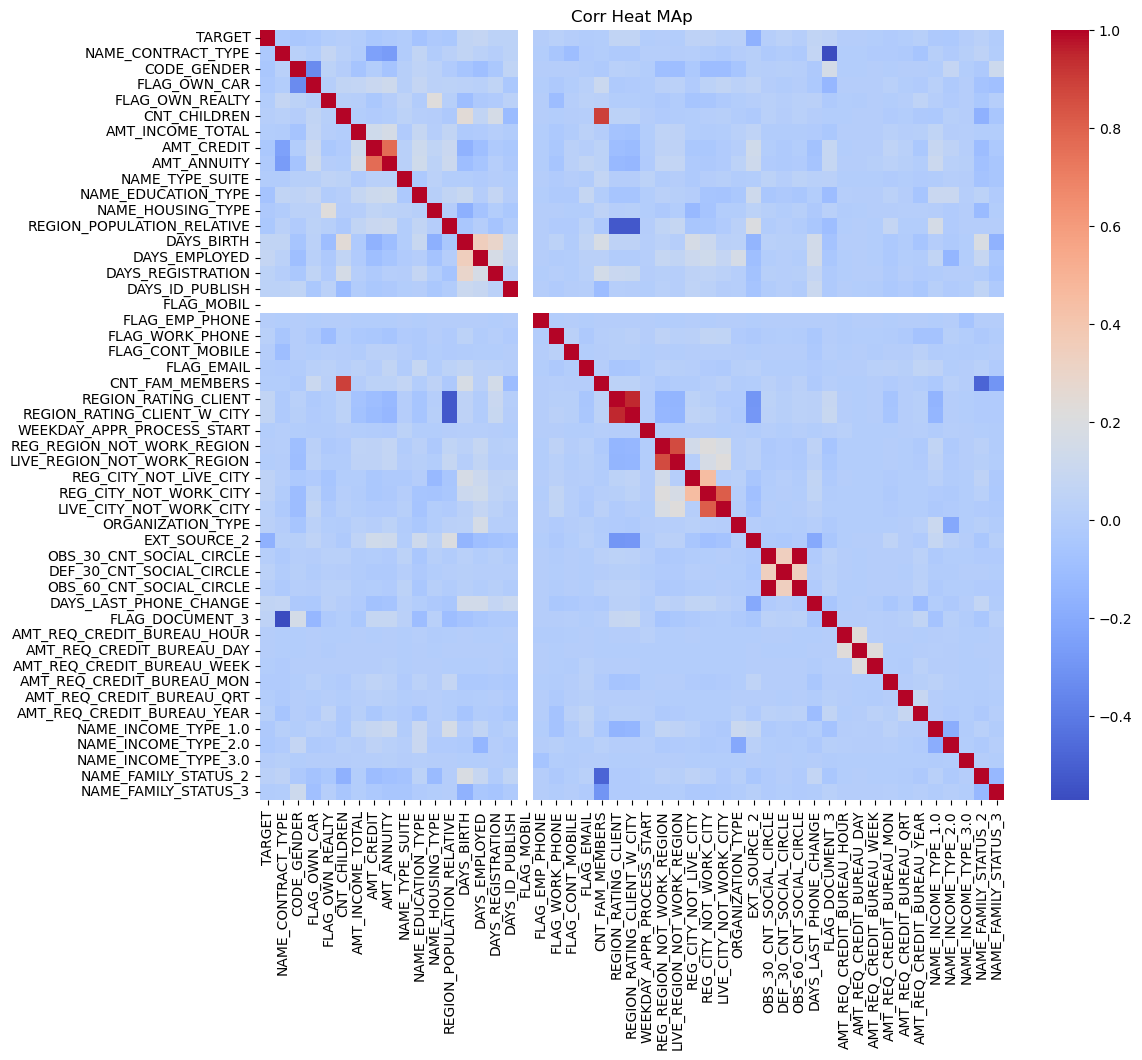

In [378]:
# corr 행렬 계산
corr_matrix = data1.corr()
# corr 행렬 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Corr Heat MAp')
plt.show()

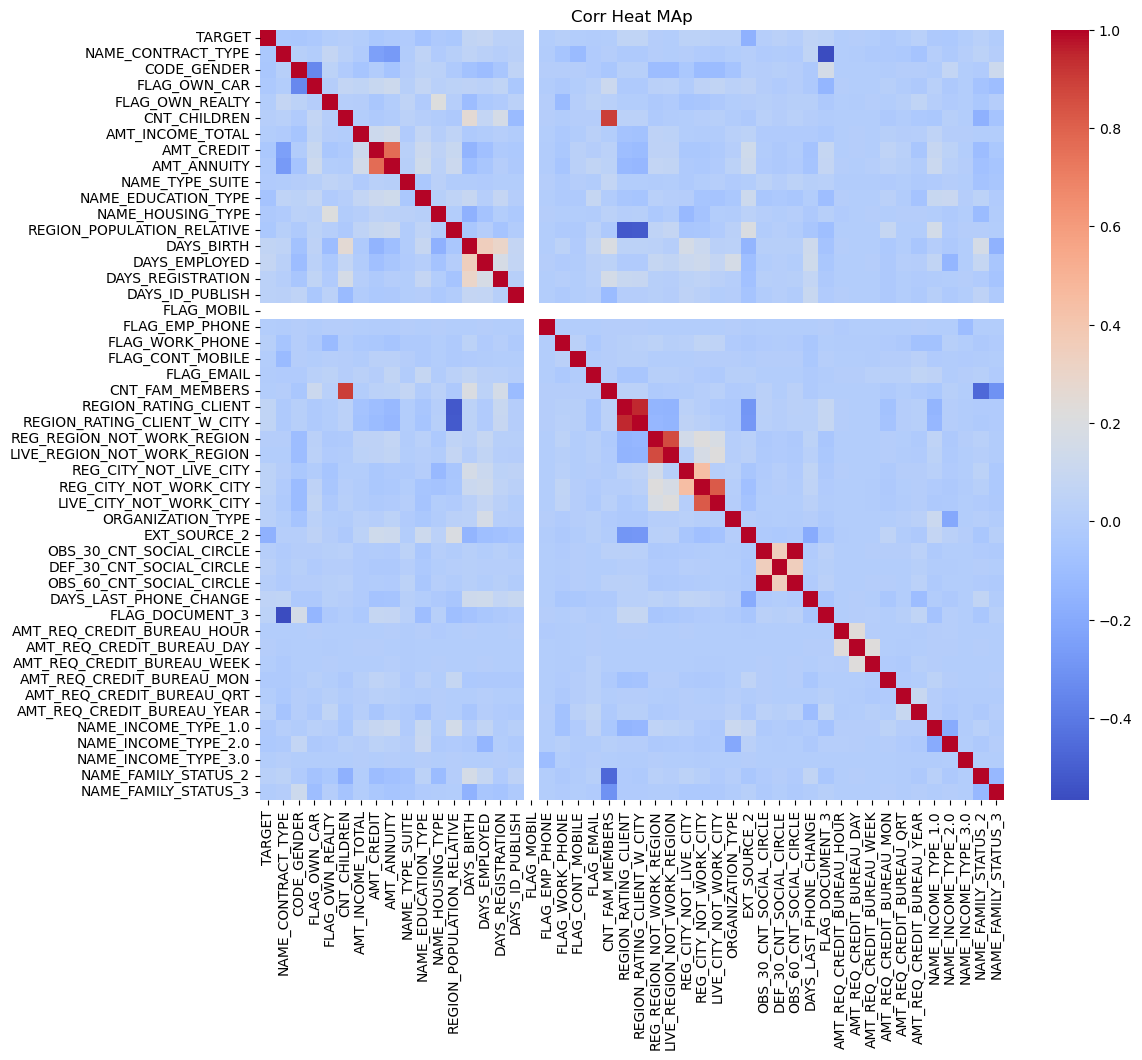

In [380]:
# corr 행렬 계산
corr_matrix = data2.corr()
# corr 행렬 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Corr Heat MAp')
plt.show()

In [382]:
'''
# 수치형 데이터 선택
numeric_data = data1.drop('TARGET', axis=1).select_dtypes(include=['float64', 'int64'])

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

# VIF 계산
vif_result = calculate_vif(numeric_data)
'''

'\n# 수치형 데이터 선택\nnumeric_data = data1.drop(\'TARGET\', axis=1).select_dtypes(include=[\'float64\', \'int64\'])\n\ndef calculate_vif(df):\n    vif_data = pd.DataFrame()\n    vif_data["feature"] = df.columns\n    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]\n    return vif_data\n\n# VIF 계산\nvif_result = calculate_vif(numeric_data)\n'

In [386]:
'''
vif_result.sort_values("VIF")
''

SyntaxError: incomplete input (3979013774.py, line 1)

In [388]:
'''
def vif(df):
    # vif 10 초과시 drop을 위한 임계값 설정
    thresh = 8
    output = pd.DataFrame()
    # 데이터의 컬럼 개수 추출
    k = df.shape[1]
    # VIF 측정
    vif = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])] # 컬럼만큼 반복
    for i in range(1,k):
        print(f'{i}번째 VIF 측정')
        # VIF 최대 값 선정
        a = np.argmax(vif)
        print(f'Max VIF feature & value : {df.columns[a]}, {vif[a]}')
        # VIF 최대 값이 임계치를 넘지 않는 경우 break
        if (vif[a] <= thresh):
            print('\n')
            for q in range(output.shape[1]):
                print(f'{output.columns[q]}의 vif는 {np.round(vif[q],2)}입니다.')
            break
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        if (i == 1):
            output = df.drop(df.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        elif (i > 1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)
'''

"\ndef vif(df):\n    # vif 10 초과시 drop을 위한 임계값 설정\n    thresh = 8\n    output = pd.DataFrame()\n    # 데이터의 컬럼 개수 추출\n    k = df.shape[1]\n    # VIF 측정\n    vif = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])] # 컬럼만큼 반복\n    for i in range(1,k):\n        print(f'{i}번째 VIF 측정')\n        # VIF 최대 값 선정\n        a = np.argmax(vif)\n        print(f'Max VIF feature & value : {df.columns[a]}, {vif[a]}')\n        # VIF 최대 값이 임계치를 넘지 않는 경우 break\n        if (vif[a] <= thresh):\n            print('\n')\n            for q in range(output.shape[1]):\n                print(f'{output.columns[q]}의 vif는 {np.round(vif[q],2)}입니다.')\n            break\n        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정\n        if (i == 1):\n            output = df.drop(df.columns[a], axis = 1)\n            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]\n        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측

In [390]:
# vif(numeric_data)

# 변수 제거